## Project 4 - Exploratory Data Analysis

**Project Objectives**

- Using `matplotlib` and `seaborn` for data visualization.
- Using more advanced `Pandas` grouping and aggregating methods.
- Resampling DateTime indices.
- Working with datetime columns in `Pandas`.
- Removing outliers.
- Investigating missing data.

## Setup Notebook

In [416]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Overview
You've just been hired by the City of Toronto. Congratulation! Toronto has been collecting data on its bike share program since 2017 and the 2019 data has just become available. The city has implemented some new initiatives to try to increase ridership numbers such as **Free Ride Wednesdays** in the month of September and the addition of new bike lanes. You manager has asked you to:
1. Merge the bike share data with local weather data from the TORONTO CITY CENTRE weather station.
2. Investigate the effect of temperature on ridership numbers.   
3. Explore different consumer behaviours between Annual Members and Casual Members.


# 1. Prepare Weather Data
## Question 1a
Check to see what weather files are available in the assignment directory. Weather file names have the following structure `en_climate_hourly_ON_6158355_01-2017_P1H.csv`. All weather file names contain the number `6158359`, which is the `TORONTO CITY CENTRE` weather station ID. Create a variable called `weather_filenames` and assign a list containing all weather file names to it. 

In [508]:
# #Use os.listdir() to filter through the files 
# save the filtered files to list, through the list comprehension.
weather_filenames = [file for file in os.listdir() if '6158359' in file]

# Print file names
print(weather_filenames[0:5])

['en_climate_hourly_ON_6158359_01-2019_P1H.csv', 'en_climate_hourly_ON_6158359_02-2019_P1H.csv', 'en_climate_hourly_ON_6158359_03-2019_P1H.csv', 'en_climate_hourly_ON_6158359_04-2019_P1H.csv', 'en_climate_hourly_ON_6158359_05-2019_P1H.csv']


## Question 1b
`weather_filenames` contains 12 files containing monthly weather data for 2019. Create a variable `weather_data` and assign a DataFrame to it that contains the data from all 12 `.csv` files. Hint: `pd.concat()` might be helpful.

Check out this [glossary](https://climate.weather.gc.ca/glossary_e.html#windChill) to get a better understanding of what the column names refer to.

In [510]:
# use concat function to put all files in weather_filenames into single large dataframe named weather_data.
weather_data = pd.concat((pd.read_csv(files,sep=',') for files in weather_filenames))

# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 00:00,2019,1,1,00:00,4.3,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 01:00,2019,1,1,01:00,5.1,...,NaN,16.1,NaN,98.47,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 02:00,2019,1,1,02:00,5.9,...,NaN,4.0,NaN,98.57,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 03:00,2019,1,1,03:00,3.3,...,NaN,16.1,NaN,98.98,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 04:00,2019,1,1,04:00,2.8,...,NaN,16.1,NaN,99.29,NaN,NaN,NaN,NaN,NaN,NaN


## Question 1c
A column called `'Date/Time'` contains hourly datetime stamps in the format `YYYY-MM-DD HH:MM`. Use `pd.DatetimeIndex()` to set the `'Date/Time'` column as the index of `weather_data`. Now the index of `weather_data` is composed of `Timestamps`. Hint: 'weather_data.columns' should no longer contain `'Date/Time'`. 

In [512]:
# Set the Date/Time column as the index, set as Datetime type. 
# Insert the duplicated Date/Time from columns.
weather_data = weather_data.set_index(pd.DatetimeIndex(weather_data['Date/Time']))
weather_data = weather_data.drop(['Date/Time'], axis=1)

# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,00:00,4.3,NaN,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
2019-01-01 01:00:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,01:00,5.1,NaN,...,NaN,16.1,NaN,98.47,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 02:00:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,02:00,5.9,NaN,...,NaN,4.0,NaN,98.57,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
2019-01-01 03:00:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,03:00,3.3,NaN,...,NaN,16.1,NaN,98.98,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 04:00:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,04:00,2.8,NaN,...,NaN,16.1,NaN,99.29,NaN,NaN,NaN,NaN,NaN,NaN


## Question 1d
The index of `weather_data` (`weather_data.index`) should be a series of Timestamps (e.g. `Timestamp('2019-01-01 00:00:00')`).

Are these Timestamps localized to a time zone? If so, which one?

The Timestamps are in EST timezone but not localized.

If the Timestamps are not localized, localize them to Toronto's time zone (Eastern Standard Time - `EST`).

In [514]:
# use the tz_localize function to Localize the data to EST, this adds the hour difference to UTC time.
weather_data.index = (weather_data.index).tz_localize('EST')

# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,00:00,4.3,NaN,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
2019-01-01 01:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,01:00,5.1,NaN,...,NaN,16.1,NaN,98.47,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 02:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,02:00,5.9,NaN,...,NaN,4.0,NaN,98.57,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
2019-01-01 03:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,03:00,3.3,NaN,...,NaN,16.1,NaN,98.98,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 04:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,04:00,2.8,NaN,...,NaN,16.1,NaN,99.29,NaN,NaN,NaN,NaN,NaN,NaN


## Question 1e
Next, plot temperature as a function of the datetime index. Your plot should look something like this.

<br>
<img src="images/temp_2019.png" alt="drawing" width="600"/>
<br>

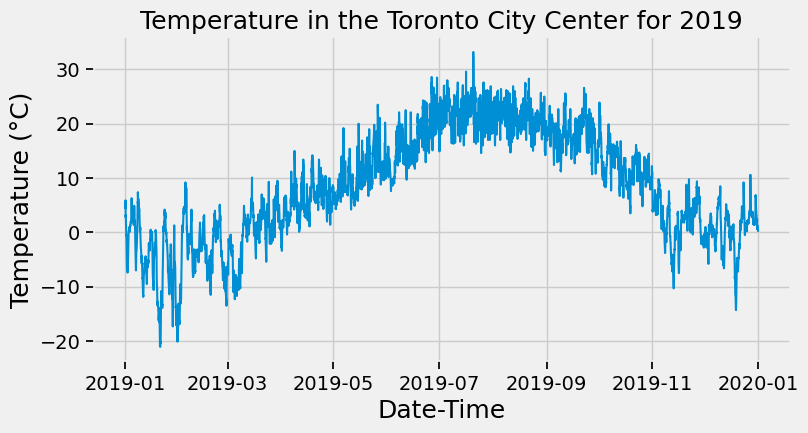

In [516]:
# use the seaborn library to generate a plot of Temperature vs. Date-Time.
plt.figure(figsize=(8, 4))

# Set the title
plt.title('Temperature in the Toronto City Center for 2019', fontsize=18)

# Create the line plot
ax = sns.lineplot(data=weather_data, x='Date/Time', y='Temp (°C)')

# Customize tick parameters
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# Set axis labels
ax.set_xlabel('Date-Time', fontsize=18)
ax.set_ylabel('Temperature (°C)', fontsize=18)

# Show the plot
plt.show()

# 2. Import Bike Share Data
The assignment folder contains data about bike share trips in the city of Toronto for 2019 where there is one `.csv` file for each month. File names have the structure `bike_share_YYYY-MM.csv`. 

In [518]:
# Get bike share file names
trips_filenames = [filename for filename in os.listdir() if 'bike_share' in filename]

# Print file names
print(trips_filenames[0:5])

['bike_share_2019-1.csv', 'bike_share_2019-10.csv', 'bike_share_2019-11.csv', 'bike_share_2019-12.csv', 'bike_share_2019-2.csv']


## Question 2a
Create a variable `trips_data` and assign a DataFrame to it that contains the bike share data from all 12 `.csv` files.

In [520]:
# use the concat function to concat all files in trips_filenames into single large dataframe, trips_data.
trips_data = pd.concat((pd.read_csv(files) for files in trips_filenames))

# Let's remove double spaces from the column names
trips_data.columns = [' '.join(col.split()) for col in trips_data.columns]              

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,2019-01-01 00:16:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,2019-01-01 00:19:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00,Dundas St W / St. Patrick St,1799,Annual Member


## Question 2b
Next, convert columns `'Start Time'` and `'End Time'` to datetimes. Then, localize `'Start Time'` and `'End Time'` to Eastern Standard Time (EST). This might take a minute or two.    

In [522]:
# use the dt.tz_localize function to localize the data to EST, adding the hour difference to UTC time.
trips_data['Start Time'] = (pd.to_datetime(trips_data['Start Time'])).dt.tz_localize('EST')
trips_data['End Time'] = (pd.to_datetime(trips_data['End Time'])).dt.tz_localize('EST')

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,1799,Annual Member


## Question 2c
To check that these datetime conversions were done correctly, generate a plot of daily ride counts. Your plot should look something like this. Hint: Check out `.resample()` and consider making a new variable.

<br>
<img src="images/trips_2019.png" alt="drawing" width="600"/>
<br> 

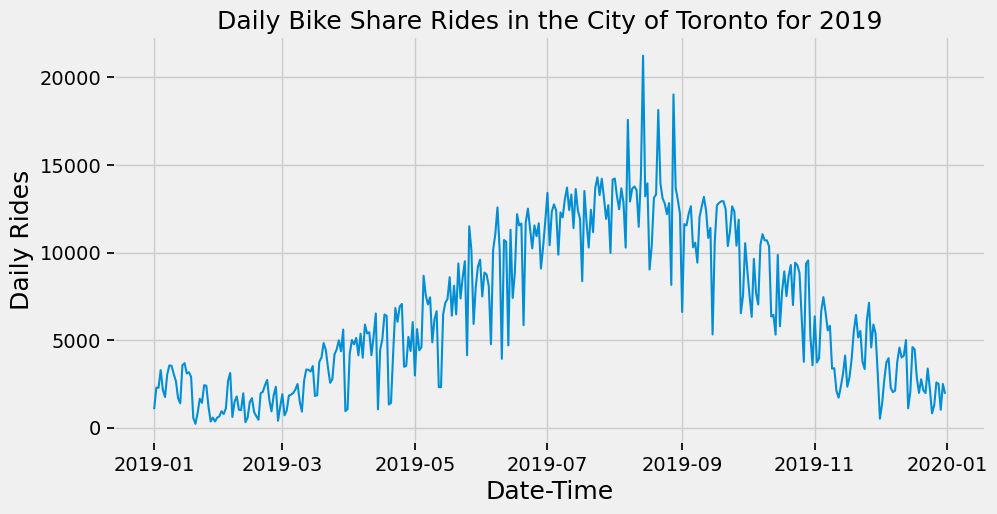

In [524]:
# create a new dataframe, showing data resampled to be per day
# aggregate the rides using the count() function.

df = trips_data.set_index('Start Time')
df=df.resample('D').count()

# use seaborn library to plot the new data-frame to get the daily rides vs time.
plt.figure(figsize=(10, 5))
plt.title('Daily Bike Share Rides in the City of Toronto for 2019', fontsize=18)
ax = sns.lineplot(data=df, x='Start Time', y='Trip Id')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Date-Time', fontsize=18)
ax.set_ylabel('Daily Rides', fontsize=18)
plt.show()

# 3. Clean Bike Share Data
## Question 3a - Missing Data
Large datasets are rarely completely full (no missing values) and its always a good idea to evaluate if there is missing data and for what fields. 

First, check for missing values in `weather_data`. Create a DataFrame named `weather_data_missing` where the index in the column names of `weather_data` and there is one column named `'count'` which contains the number of missing values for a particular column.

In [526]:
# use the is_na function to check for missing values in weather_data.
# use the count() to aggregate the missing values to get the total missing values.
weather_data_missing = (weather_data.isna().sum()).to_frame('count')

# View DataFrame
weather_data_missing

,count
Longitude (x),0
Latitude (y),0
Station Name,0
Climate ID,0
Year,0
Month,0
Day,0
Time,0
Temp (°C),95
Temp Flag,8681


Next, check for missing values in `trips_data`. Create a DataFrame named `trips_data_missing` where the index in the column names of `trips_data` and there is one column named `'count'` which contains the number of missing values for a particular column.

In [528]:
# apply to trips_data dataframe using the same coding process above.
trips_data_missing = (trips_data.isna().sum()).to_frame('count')

# View DataFrame
trips_data_missing

,count
Trip Id,0
Subscription Id,0
Trip Duration,0
Start Station Id,0
Start Time,0
Start Station Name,0
End Station Id,454
End Time,0
End Station Name,454
Bike Id,0


We can see that some columns have missing values. However, having missing data does not necessarily mean that something is wrong with an entry. For example, the `Weather` column contains the following unique values:

In [530]:
weather_data['Weather'].unique().tolist()

['Rain,Fog',
 nan,
 'Snow',
 'Rain,Snow',
 'Fog',
 'Rain',
 'Moderate Rain',
 'Freezing Rain,Fog',
 'Haze',
 'Snow,Blowing Snow',
 'Heavy Snow',
 'Moderate Snow',
 'Haze,Blowing Snow',
 'Moderate Rain,Fog',
 'Thunderstorms,Rain',
 'Thunderstorms,Moderate Rain,Fog',
 'Thunderstorms',
 'Thunderstorms,Heavy Rain,Fog',
 'Heavy Rain,Fog',
 'Thunderstorms,Moderate Rain',
 'Thunderstorms,Fog',
 'Thunderstorms,Heavy Rain',
 'Freezing Rain']

You can see that only non-normal/clear weather events are listed. So, when `weather_data['Weather'] == NaN`, the conditions are clear. Therefore, we would never want to remove rows where `weather_data['Weather'] == NaN`.

We can see that the first 8 columns of `weather_data_missing` have no missing data, so we can leave `weather_data` and address the missingness on a case-by-case basis depending on which columns we're analyzing.

For `trips_data`, we can see that `'End Station Id'` and `'End Station Name'` have 454 missing values, which is only 0.01% of the dataset. This might suggest corruption and given the small number of missing values, we can safely drop these rows. 

## Question 3b - Missing Data
Drop any rows of `trips_data` with missing values.

In [532]:
# apply the dropna function to trips_data to remove any rows with missing values
trips_data = trips_data.dropna()

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,1799,Annual Member


## Question 4a - Outliers
Outliers in your datasets can be both good and bad. One the one hand, they may contain important information while on the other hand, they skew your visualizations and may bias your models. 

As a simple first pass, let's look at the summary statistics for `trips_data` using `.describe()` (remember, it only works for numeric data).

In [534]:
trips_data.describe()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,End Station Id,Bike Id
count,2.439063e+06,2.439063e+06,2.439063e+06,2.439063e+06,2.439063e+06,2.439063e+06
mean,5.957049e+06,3.529029e+05,1.044105e+03,7.183801e+03,7.183547e+03,2.718808e+03
std,7.885706e+05,8.000075e+04,1.853783e+04,1.355055e+02,1.354044e+02,1.388448e+03
min,4.581278e+06,6.537700e+04,0.000000e+00,7.000000e+03,7.000000e+03,1.400000e+01
25%,5.277110e+06,3.099960e+05,4.250000e+02,7.058000e+03,7.058000e+03,1.614000e+03
50%,5.956799e+06,3.394030e+05,6.880000e+02,7.171000e+03,7.171000e+03,2.909000e+03
75%,6.637216e+06,4.073290e+05,1.081000e+03,7.282000e+03,7.282000e+03,3.801000e+03
max,7.334127e+06,5.239440e+05,1.240378e+07,7.511000e+03,7.511000e+03,5.038000e+03


Right away we notice something a bit funny with `'Trip Duration'`. The min and max values seem implausible. A trip cannot last `0 seconds` (you'd have to be biking at the speed of light!) and its unlikely that a trip lasted for `1.240378e+07 seconds`. `1.240378e+07 seconds` is roughly 4.78 months, which would be quite the ride and cost tens of thousands of dollars. We can see that the average `'Trip Duration'` is roughly 17 minutes.

We've been told by Bike Share Toronto that trips lasting less than 1 minute can be considered false trips. Remove all trips from `trips_data` with a duration less than 60 seconds.

In [536]:
# use column value filtering to remove trips less that 60seconds
trips_data = trips_data[trips_data['Trip Duration']>60]

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,1799,Annual Member


## Question 4b - Outliers
Next, remove any `'Trip Duration'` values less than `Q1 - 1.5 * IQR` and greater than `Q3 + 1.5 * IQR`. 

- Q1: The first quartile (`.quantile(0.25)`)
- Q3: The third quartile (`.quantile(0.75)`)
- IQR: The first quartil (`Q3 - Q1`)
<br>
<img src="images/probability_density.png" alt="drawing" width="450"/>
<br> 

In [538]:
# use quantile to find the 1st and 3rd quartile. 
# the Interquartile Range (IQR) is the difference between the two.
Q1 = trips_data['Trip Duration'].quantile(0.25)
Q3 = trips_data['Trip Duration'].quantile(0.75)
IQR = Q3 - Q1

# Removing the outliers
trips_data = trips_data[
    (trips_data['Trip Duration'] > (Q1 - 1.5 * IQR)) &
    (trips_data['Trip Duration'] < (Q3 + 1.5 * IQR))
]

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,1799,Annual Member


## Question 4c - Outliers
Plot a histogram + density plot using `sns.distplot()` of the `'Trip Duration'`. Ensure that `'Trip Duration'` is displayed in minutes. Your plot should look something like this.
<br>
<img src="images/trip_durations.png" alt="drawing" width="450"/>
<br> 

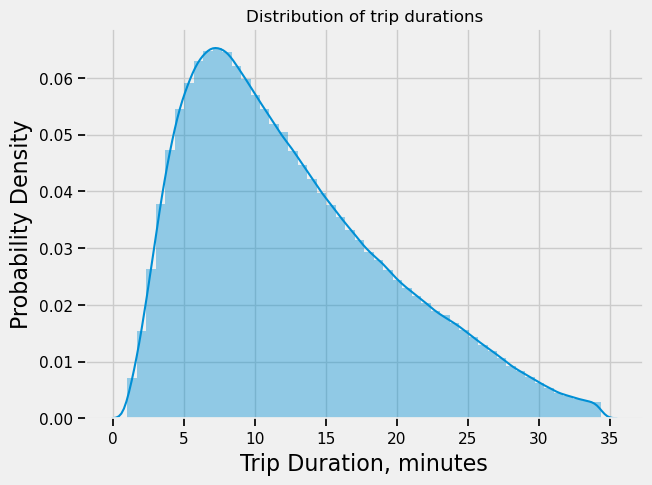

In [540]:
# use seaborn to plot the distribution of trip durations. 
# divide trips_data['Trip Duration'] by 60 to show the duration in minutes

sns.distplot(trips_data['Trip Duration']/60, rug=False)
plt.xlabel('Trip Duration, minutes', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Distribution of trip durations')
plt.show()

## Question 5 - Duplicates
Remove any entries from `trips_data` which have the same `'Trip Id'`.

In [542]:
# use drop_duplicates to drop duplicates from the column Trip Id
trips_data = trips_data.drop_duplicates('Trip Id')

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,1799,Annual Member


# 4. Merge Datasets
To facilitate an analysis of the effect of weather on ridership, we must merge two DataFrames (`weather_data` and `trips_data`).

## Question 6
Use the `.merge()` function to combine `weather_data` and `trips_data` using datetime information and set the output to a new variable called `data_merged`. In `trips_data` there are two time stamps corresponding to the start and end of the ride. Use the `'Start Time'` of the rides to merge. 

`trips_data` datetimes contain information down to the minute, while `weather_data` is reported every hour. Thus, we must merge based on a common year, month, day, hour. Hint: create a new column in `trips_data` called `'merge_time'` and set it equal to `trips_data['Start Time']` rounded to the nearest hour.

In [544]:
# create a new column, merge_time, by rounding off start time to the nearest hour.
# merge the weather_data and trips_data, and using merge_time and Date/Time columns as keys, respectively
trips_data['merge_time'] = trips_data['Start Time'].dt.round('H')

# Merge the trips data with the weather data on the rounded time
data_merged = trips_data.merge(weather_data, 
                                left_on='merge_time', 
                                right_on='Date/Time', 
                                how='inner')  # You can specify the type of join if needed

# View DataFrame
data_merged.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
3,4581281,171700,259,7012,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,283,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
4,4581282,306314,281,7041,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,1799,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"


# 5. Analysis of 'User Type'
## Question 7a
First, we'll explore the daily number for Annual Members and Casual Members. Casual Members pay on a per ride basis while Annual Members pay a monthly subcription fee. The DataFrame `data_merged` has a temporal resolution of a minute. Therefore, in order to look at daily numbers, we'll need to convert `data_merged` so that every row corresponds to a day. Create a new DataFrame called `data_days` with three columns:
- ride: The total number of rides for a particular day.
- annual_members: Number of rides by Annual Members.
- casual_members: Number of rides by Casual Members.
- workday: Was this day a workday (True) or a weekend day (False).

Your DataFrame should looks something like this.

<br>
<img src="images/data_days.png" alt="drawing" width="500"/>
<br>

As a quick sanity check you can check that the number of rows in `data_merged` is equal to the sum of `data_days['rides']`.

Hint: You can use the `.groupby()` method and the `agg()` method to compute this transformation in a single line of code.

In [546]:
# A new column Start Time Day is created to floor Start Time to nearest Day.
# use groupby to aggregate all data by annual members first.
# use same groupby to find the casual members. 
# use .weekday to find the weekdays, showing workdays less than 5.

data_merged['Start Time Day'] = data_merged['Start Time'].dt.floor('D')

data_days = (data_merged[data_merged['User Type'] == 'Annual Member']
              .groupby(by=['Start Time Day'])
              .agg(annual_members=('User Type', 'count')))

data_days['casual_members'] = (data_merged[data_merged['User Type'] == 'Casual Member']
                                .groupby(by=['Start Time Day'])
                                .agg(casual_members=('User Type', 'count')))

data_days['casual_members'] = data_days['casual_members'].fillna(0)
data_days['rides'] = data_days['annual_members'] + data_days['casual_members']
data_days['workday'] = data_days.index.to_series().dt.dayofweek < 5  # Monday-Friday are workdays (0-4)
data_days.index.names = ['Start Time']


# View DataFrame
data_days.head()

,annual_members,casual_members,rides,workday
Start Time,,,,
2019-01-01 00:00:00-05:00,870,122.0,992.0,True
2019-01-02 00:00:00-05:00,2140,74.0,2214.0,True
2019-01-03 00:00:00-05:00,2178,42.0,2220.0,True
2019-01-04 00:00:00-05:00,3086,139.0,3225.0,True
2019-01-05 00:00:00-05:00,1894,194.0,2088.0,False


## Question 7b
Use `sns.distplot()` to create a plot showing the distributions of daily ride counts from `data_days` for Casual Members and Annual Members. Your plot should look something like this. 

<br>
<img src="images/ride_count_histogram.png" alt="drawing" width="600"/>
<br>

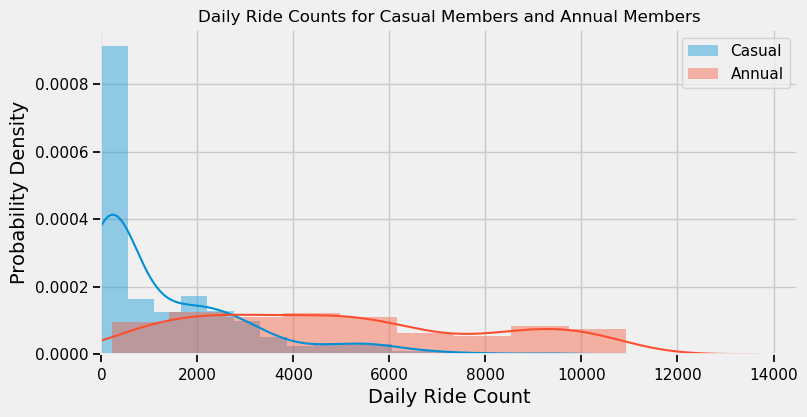

In [572]:
# use distplot to plot the columns casual_members and annual_members directly in a probability density plot.
# Create the figure

plt.figure(figsize=(8, 4))
sns.distplot(data_days['casual_members'], label='Casual')
sns.distplot(data_days['annual_members'], label='Annual')
plt.xlabel('Daily Ride Count', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title('Daily Ride Counts for Casual Members and Annual Members')
plt.xlim(left=0)
plt.legend()

# Show the plot
plt.show()


## Question 7c
Use `sns.scatterplot()` to create a scatter plot showing the relationship between daily ride counts from `data_days` for Casual Members and Annual Members. Your plot should look something like this. 

<br>
<img src="images/ride_count_scatter.png" alt="drawing" width="600"/>
<br>

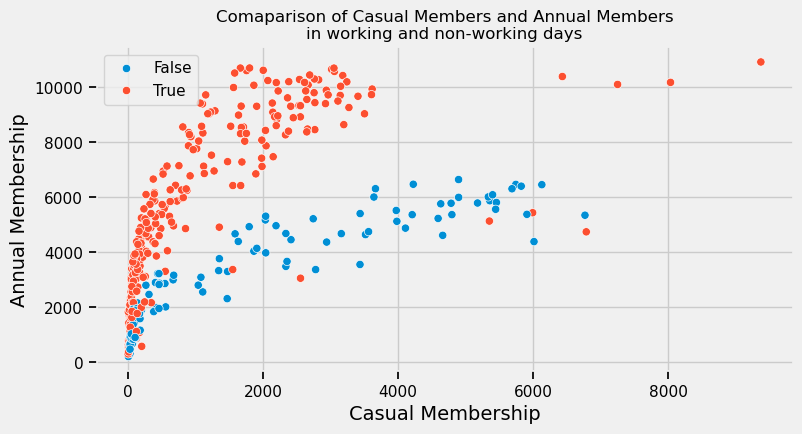

In [550]:
# use scatter plot to plot casual_members vs annual_members columns, setting the hue to workday inorder to color code the data.
plt.figure(figsize=(8, 4))
sns.scatterplot(data= data_days, x=data_days['casual_members'], y=data_days['annual_members'], hue='workday')

plt.xlabel('Casual Membership', fontsize=14)
plt.ylabel('Annual Membership', fontsize=14)
plt.title('Comaparison of Casual Members and Annual Members\nin working and non-working days')

plt.legend()

plt.show()

## Question 7d
Looking at the figure you've generated for **Question 7c**, some interesting outliers have appeared. In particular, there are some `workday` data points that appear to follow the `non-workday` trend. What could explain these outliers and what additional information could be collected to address them? 

These workdays are likely holidays that occur on weekdays rather than actual workdays. It’s important to compile a list of all holidays to filter the date data accurately, distinguishing between working days and weekends. Additionally, there are several unusually high points for annual membership, which may be linked to seasonal trends when the weather is more favorable, leading to an increase in annual memberships.

## Question 7e
Let's examine the hourly ride counts for `Annual Members` and `Casual Members`. First thing we have to do is create a new DataFrame called `data_hours`. `data_hours` should have its index set to hours (0 to 23) using the `'Start Time'` column and three columns `'rides', 'annual_members', 'casual_members'`. These should be average hourly values. 

In [552]:
# use groupby statements to merge and count the number of members after the Start Time is being rounded to the nearest hour. 
# divide the counts by 365 days to get the average hourly values.

data_merged['Start Time Hour']=data_merged['Start Time'].dt.hour
data_hours = (data_merged[data_merged['User Type']=='Annual Member'].groupby(by=['Start Time Hour']).agg(annual_member=('User Type', 'count')).div(365))
data_hours['casual_member']=(data_merged[data_merged['User Type']=='Casual Member'].groupby(by=['Start Time Hour']).agg(casual_member=('User Type', 'count'))).div(365)
data_hours['rides'] = data_hours['annual_member']+data_hours['casual_member']
data_hours.index.names = ['Start Time Hour']

# View DataFrame
data_hours.head()

,annual_member,casual_member,rides
Start Time Hour,,,
0,47.306849,17.372603,64.679452
1,28.435616,11.364384,39.800000
2,20.041096,8.230137,28.271233
3,9.523288,4.041096,13.564384
4,8.652055,2.032877,10.684932


## Question 7f
Use `data_hours` to create a plot showing the average number of hourly rides for `Annual Members` and `Casual Members`. Your plot should look something like this.

<br>
<img src="images/hourly_rides.png" alt="drawing" width="600"/>
<br>

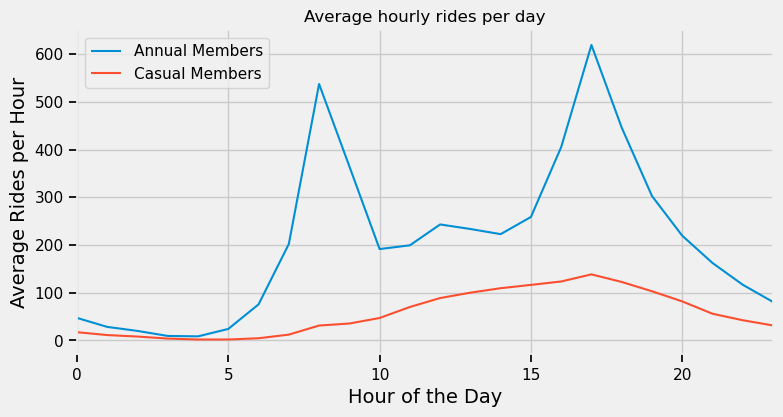

In [554]:
# for the casual and annual members, use seaborn lineplot to show average hourly ride data during hour of the data.
plt.figure(figsize=(8, 4))
sns.lineplot(x=data_hours.index, y=data_hours['annual_member'],label='Annual Members')
sns.lineplot(x=data_hours.index, y=data_hours['casual_member'],label='Casual Members')

plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Rides per Hour', fontsize=14)
plt.title('Average hourly rides per day')
plt.xlim([0,23])

plt.legend()

plt.show()

## Question 7g
What can you observe from the plot? Hypothesize about the meaning of the peaks for casual and annual membership riders.

Casual members show a slight peak in the late afternoon, which probably indicates that they use the bicycles for recreational purposes after work. Annual members, on the other hand, exhibit two peaks in usage—one in the morning and another in the late afternoon. This pattern likely reflects their use of bicycles for commuting to work. 

# 5. Analysis of 'Weather'
In this section, we'll be looking at the influence of weather conditions, such as temperature and precipitation, on ridership activity.

First, let's take a look at the missingness for `data_merged`. 

In [556]:
data_merged.isnull().sum(axis=0).to_frame('count')

,count
Trip Id,0
Subscription Id,0
Trip Duration,0
Start Station Id,0
Start Time,0
Start Station Name,0
End Station Id,0
End Time,0
End Station Name,0
Bike Id,0


We can see that the `'Weather'` column has 2,141,573 missing values. Now let's take a look at the unique labels in the `'Weather'` column and how many entries contain each one.

In [558]:
data_merged.groupby('Weather')['Trip Id'].count().sort_values(ascending=False)

Weather
Rain                               71353
Fog                                45806
Snow                               28023
Rain,Fog                           18783
Haze                                7531
Thunderstorms,Rain                  2821
Moderate Rain,Fog                   2691
Thunderstorms                       2468
Thunderstorms,Heavy Rain,Fog        2393
Moderate Rain                       1772
Rain,Snow                            865
Thunderstorms,Fog                    730
Thunderstorms,Moderate Rain          670
Thunderstorms,Heavy Rain             360
Heavy Rain,Fog                       226
Moderate Snow                        224
Snow,Blowing Snow                    109
Freezing Rain,Fog                    104
Haze,Blowing Snow                     82
Heavy Snow                            57
Freezing Rain                         31
Thunderstorms,Moderate Rain,Fog       25
Name: Trip Id, dtype: int64

We can see that the most common `'Weather'` labels are `'Rain'`, `'Fog'`, and `'Rain,Fog'`. There is no label for **clear** condition, which suggests that the 2,141,573 NaN values correspond to **clear** conditions.

## Question 8a
The first thing we have to do is transform `data_merged` to contain aggregated values for each hour. Remember, `data_merged`'s granularity is at the ride level. Each row, corresponds to one ride with a temporal resolution of one minute. Therefore, there can be multiple entries for the same minute.

Create a new variable called `hourly_rides_and_weather` and assign a DataFrame to it containing the following information:
- Index: DatetimeIndex with a resolution of 1 hour (2019-01-01 10:00:00, 2019-01-01 11:00:00, 2019-01-01 12:00:00, 2019-01-01 13:00:00, etc.). Use `'Start Time'` to generate this index.
- Column 1 `'rides'`: How many rides were recorded during a particular hour.
- Column 2 `'annual_members'`: How many `'Annual Member'` rides were recorded during a particular hour.
- Column 3 `'casual_members'`: How many `'Casual Member'` rides were recorded during a particular hour.
- Column 4 `'workday'`: Does this hour correspond to a workday or a weekend day (True, False). 
- Column 5 `'temp'`: Reported temperature from the `'Temp (°C)'` column. 
- Column 6 `'weather'`: Reported weather conditions from the `'Weather'` column. 

<br>
<img src="images/hourly_rides_and_weather_1.png" alt="drawing" width="600"/>
<br>

Hints:
1. Use `.groupby()` and `.agg()`.
2. This is an example of how you can use `.agg()` to compute Column 1 `'rides'`: `.agg(rides=('rides', 'sum'))`.
3. Use `data_merged['Start Time'].dt.floor('H')` to groupby hour.

In [560]:
# the data is grouped by the hourly data and use count to find the number of casual and annual members after rounding the data to H using the floor function
# find the Workday and rides using the same technique in 7a.
# use groupby statement to find the temperature, take the max value from the aggregates.
# use apply as the aggregation function to find weather, using the first value to represent the weather in that hour.
data_merged['Start Time'] = data_merged['Start Time'].dt.floor('H')

# Group by 'Start Time' for annual members and aggregate
hourly_rides_and_weather = (data_merged[data_merged['User Type'] == 'Annual Member']
                            .groupby(by=['Start Time'])
                            .agg(annual_member=('User Type', 'count')))

hourly_rides_and_weather['casual_member'] = (data_merged[data_merged['User Type'] == 'Casual Member']
                                             .groupby(by=['Start Time'])
                                             .agg(casual_member=('User Type', 'count')))

hourly_rides_and_weather[['annual_member', 'casual_member']] = hourly_rides_and_weather[['annual_member', 'casual_member']].fillna(0)
hourly_rides_and_weather['rides'] = hourly_rides_and_weather['annual_member'] + hourly_rides_and_weather['casual_member']
hourly_rides_and_weather['workday'] = hourly_rides_and_weather.index.weekday < 5
hourly_rides_and_weather['temp'] = data_merged.groupby(by=['Start Time']).agg(temp=('Temp (°C)', 'max'))
hourly_rides_and_weather['weather'] = data_merged.groupby(by=['Start Time'])['Weather'].apply(lambda x: x.iloc[0])
hourly_rides_and_weather = hourly_rides_and_weather[['rides', 'annual_member', 'casual_member', 'workday', 'temp', 'weather']]

# View the DataFrame
hourly_rides_and_weather.head(10)


,rides,annual_member,casual_member,workday,temp,weather
Start Time,,,,,,
2019-01-01 00:00:00-05:00,20.0,20,0.0,True,5.1,"Rain,Fog"
2019-01-01 01:00:00-05:00,30.0,27,3.0,True,5.9,NaN
2019-01-01 02:00:00-05:00,20.0,17,3.0,True,5.9,"Rain,Fog"
2019-01-01 03:00:00-05:00,13.0,13,0.0,True,3.3,NaN
2019-01-01 04:00:00-05:00,7.0,7,0.0,True,3.2,NaN
2019-01-01 05:00:00-05:00,5.0,5,0.0,True,3.2,NaN
2019-01-01 06:00:00-05:00,9.0,8,1.0,True,2.7,NaN
2019-01-01 07:00:00-05:00,13.0,12,1.0,True,2.3,NaN
2019-01-01 08:00:00-05:00,19.0,19,0.0,True,1.9,NaN


## Question 8b
Next, let's transform `hourly_rides_and_weather` from hourly to daily sampling. As we saw for **Question 7g**, there are strong trends within each day, which could complicate our initial analysis. Therefore, by aggregating by day-of-the-week, we'll remove some of this trend.

Modify `hourly_rides_and_weather` to include the following information:
- Index: DatetimeIndex with a resolution of 1 day (2019-01-01 00:00:00, 2019-01-02 00:00:00, 2019-01-03 00:00:00, 2019-01-04 00:00:00, etc.). Use `'Start Time'` to generate this index.
- Column 1 `'rides'`: How many rides were recorded during a particular day.
- Column 2 `'annual_members'`: How many `'Annual Member'` rides were recorded during a particular day.
- Column 3 `'casual_members'`: How many `'Casual Member'` rides were recorded during a particular day.
- Column 4 `'workday'`: Is this a workday or a weekend day (True, False). 
- Column 5 `'temp'`: The maximum temperature recorded for a particular day. 
- Column 6 `'weather'`: This column should contain one of two values (`'clear'` or `'Precipitation'`). `'Clear'` should be assigned to days where 50% or more of the hours of that day had no precipitation events (Rain, Fog, Snow, Rain, Fog, etc.). Remember, `hourly_rides_and_weather['weather']` contains an `NaN` value when there was no precipitation event. When more than 50% of the hours of a day had a precipitation event, assign `'Precipitation'`.  

<br>
<img src="images/hourly_rides_and_weather_2.png" alt="drawing" width="600"/>
<br>

In [562]:
# use the weather_result function to count the amount of NaN values in the weather column.
def weather_result(weather):
    counter=weather.isnull().sum()
    if counter>=12:
        result='Clear'
    else:
        result='Precipitation'     
    return result  
    
hourly_rides_and_weather.index = (hourly_rides_and_weather.index).floor('D')
hourly_rides_and_weather = hourly_rides_and_weather.groupby(by=['Start Time']).agg(rides=('rides', 'sum')
                                                                                   ,annual_member=('annual_member', 'sum')
                                                                                   ,casual_member=('casual_member', 'sum')
                                                                                   ,workday=('workday', 'mean')
                                                                                   ,temp=('temp', 'max')
                                                                                   ,weather=('weather',weather_result))


# View DataFrame
hourly_rides_and_weather.head(10)

,rides,annual_member,casual_member,workday,temp,weather
Start Time,,,,,,
2019-01-01 00:00:00-05:00,992.0,870,122.0,1.0,5.9,Clear
2019-01-02 00:00:00-05:00,2214.0,2140,74.0,1.0,0.3,Clear
2019-01-03 00:00:00-05:00,2218.0,2178,40.0,1.0,1.6,Clear
2019-01-04 00:00:00-05:00,3225.0,3086,139.0,1.0,6.3,Clear
2019-01-05 00:00:00-05:00,2088.0,1894,194.0,0.0,3.5,Clear
2019-01-06 00:00:00-05:00,1694.0,1566,128.0,0.0,4.9,Clear
2019-01-07 00:00:00-05:00,2951.0,2890,61.0,1.0,3.6,Clear
2019-01-08 00:00:00-05:00,3487.0,3427,60.0,1.0,7.4,Clear
2019-01-09 00:00:00-05:00,3460.0,3406,54.0,1.0,3.7,Clear


## Question 8c
Let's investigate the relationship between weather conditions and ridership numbers. Create a violin plot using `sns.violinplot()` that looks something like the figure below.

<br>
<img src="images/weather_daily_rides_1.png" alt="drawing" width="600"/>
<br>

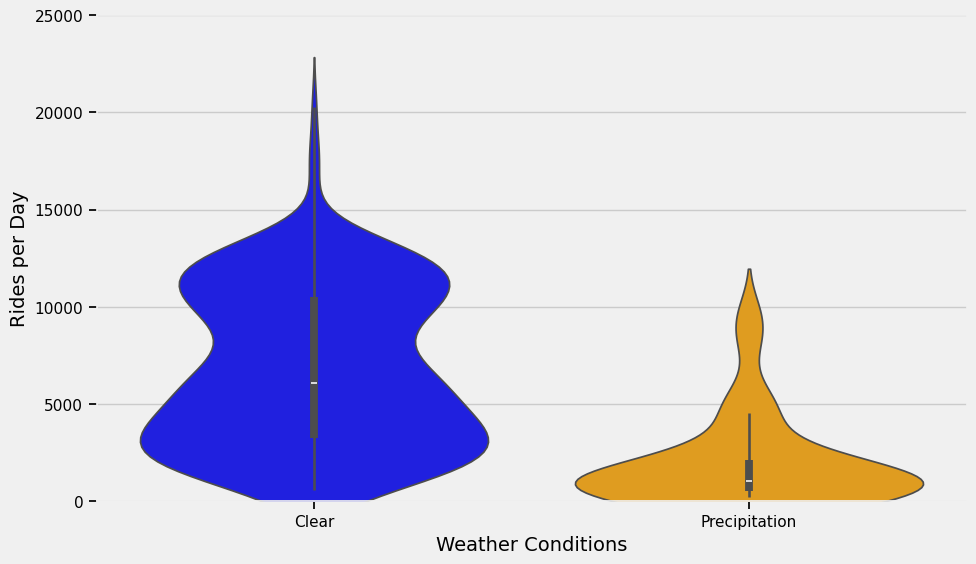

In [564]:
# using the rides per day data, generate a violin plot, splitting up the data based on weather conditions.
weather_colors = {
    'Clear': 'blue',
    'Precipitation': 'orange'
}

plt.figure(figsize=(10, 6))
sns.violinplot(data=hourly_rides_and_weather, 
                y='rides', 
                x='weather', 
                palette=weather_colors)

plt.xlabel('Weather Conditions', fontsize=14)
plt.ylabel('Rides per Day', fontsize=14)
plt.ylim([0, 25000])

# Show the plot
plt.show()

## Question 8d
Let's investigate the relationship between the maximum daily temperature and ridership numbers. Create a scatter plot using `sns.scatterplot()` that looks something like the figure below.

<br>
<img src="images/temp_daily_rides.png" alt="drawing" width="600"/>
<br>

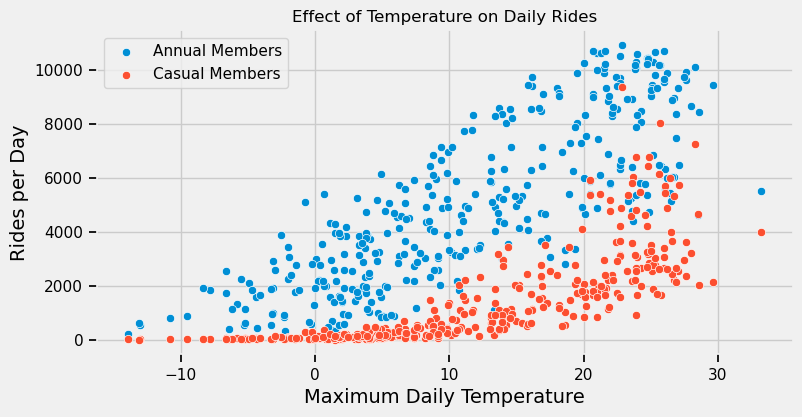

In [566]:
# use seaborn scatterplot to show rides per day, depending on membership type. 
# plot two series because each of the annual and casual members are separate columns.
plt.figure(figsize=(8, 4))
sns.scatterplot(x=hourly_rides_and_weather['temp'], y=hourly_rides_and_weather['annual_member'],label='Annual Members')
sns.scatterplot(x=hourly_rides_and_weather['temp'], y=hourly_rides_and_weather['casual_member'],label='Casual Members')

plt.xlabel('Maximum Daily Temperature', fontsize=14)
plt.ylabel('Rides per Day', fontsize=14)
plt.title('Effect of Temperature on Daily Rides')

plt.legend()

plt.show()

## Question 8e
Reflect on the figures you've generated for **Question 8c** and **Question 8d**. What trends can you identify from these plots and can you suggest any potential issues with them or modifications you'd suggest to improve them?

8C- There are more rides per day when conditions are clear, while data points indicating precipitation show very low daily ride numbers. From a visual assessment of the plots, it appears that there are approximately 2-3 times as many days with low ride counts when precipitation is present. To enhance clarity, additional labels are needed to explain the significance of the varying widths, rather than just providing a general idea of the data spread.

8D- There is a clear trend of increased rides as maximum temperature rises. Annual members, in particular, tend to take more rides with higher temperatures, possibly as they seek to maximize the value of their membership. Adding a trend line to this data, along with the R2 value, could provide a mathematical confirmation of these relationships.